In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

In [ ]:
import cv2
import os

def save_frames_from_video(video_file, num_frames=24, save_dir="frames"):

    video_name = os.path.splitext(os.path.basename(video_file))[0]

    output_dir = os.path.join(save_dir, video_name)
    os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_file)
    frame_skip = 150

    img_idx = 0
    current_frame = 0

    while img_idx < num_frames:
        ret, img = cap.read()
        if not ret:
            break

        if current_frame % frame_skip == 0:
            img_filename = os.path.join(output_dir, f'{video_name}_{img_idx:04d}.jpg')
            cv2.imwrite(img_filename, img)

            img_idx += 1

        current_frame += 1

    cap.release()

video_files = [f"video{i}.mp4" for i in range(1, 18)]

for video_file in video_files:
    save_frames_from_video(video_file, num_frames=24)


In [ ]:
import cv2
import os

def save_frames_from_video(video_file, num_frames=24, save_dir="frames"):

    video_name = os.path.splitext(os.path.basename(video_file))[0]

    output_dir = os.path.join(save_dir, video_name)
    os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_file)
    frame_skip = 150

    img_idx = 0
    current_frame = 0

    while img_idx < num_frames:
        ret, img = cap.read()
        if not ret:
            break

        if current_frame % frame_skip == 0:
            img_filename = os.path.join(output_dir, f'{video_name}_{img_idx:04d}.jpg')
            cv2.imwrite(img_filename, img)

            img_idx += 1

        current_frame += 1

    cap.release()

video_files = [f"video{i}.mp4" for i in range(18, 37)]

for video_file in video_files:
    save_frames_from_video(video_file, num_frames=24)


In [ ]:
import cv2
import os

def save_frames_from_video(video_file, num_frames=24, save_dir="frames"):

    video_name = os.path.splitext(os.path.basename(video_file))[0]

    output_dir = os.path.join(save_dir, video_name)
    os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_file)
    frame_skip = 150

    img_idx = 0
    current_frame = 0

    while img_idx < num_frames:
        ret, img = cap.read()
        if not ret:
            break

        if current_frame % frame_skip == 0:
            img_filename = os.path.join(output_dir, f'{video_name}_{img_idx:04d}.jpg')
            cv2.imwrite(img_filename, img)

            img_idx += 1

        current_frame += 1

    cap.release()

video_files = [f"video{i}.mp4" for i in range(37, 51)]

for video_file in video_files:
    save_frames_from_video(video_file, num_frames=24)


In [ ]:
import cv2
import os
import numpy as np
import keras
from keras import layers
from keras.callbacks import TensorBoard

def preprocess_frames(video_folder, target_shape=(128, 128)):
    frame_files = sorted(os.listdir(video_folder))
    frames = []

    for frame_file in frame_files:
        frame_path = os.path.join(video_folder, frame_file)
        frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)

        if frame is not None:
            frame = cv2.resize(frame, target_shape)
            frames.append(frame)

    frames = np.array(frames, dtype='float32') / 255.
    frames = np.reshape(frames, (len(frames), target_shape[0], target_shape[1], 1))
    return frames

def create_autoencoder(input_shape):
    input_img = keras.Input(shape=input_shape)
    x = layers.Reshape((input_shape[0], input_shape[1], 1))(input_img)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    encoder = keras.Model(input_img, encoded)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)

    autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')

    return encoder, autoencoder

def train_autoencoder(autoencoder, frames):
    autoencoder.fit(frames, frames,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(frames, frames),
                    callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

def save_embeddings(encoder, frames, save_folder, video_name):
    embeddings = encoder.predict(frames)
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f'{video_name}_embeddings.npy')
    np.save(save_path, embeddings)

video_folders = [f"frames/video{i}" for i in range(1, 18)]

save_folder = "all_embeddings_folder"

for video_folder in video_folders:
    frames = preprocess_frames(video_folder)
    target_shape = (128, 128)

    frames = preprocess_frames(video_folder, target_shape)

    encoder, autoencoder = create_autoencoder(input_shape=target_shape)
    train_autoencoder(autoencoder, frames)

    video_name = os.path.basename(video_folder)
    save_embeddings(encoder, frames, save_folder, video_name)


Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6923 - val_loss: 0.6866
Epoch 2/20
1/1 [==============================] - 1s 837ms/step - loss: 0.6866 - val_loss: 0.6834
Epoch 3/20
1/1 [==============================] - 1s 875ms/step - loss: 0.6834 - val_loss: 0.6828
Epoch 4/20
1/1 [==============================] - 1s 598ms/step - loss: 0.6828 - val_loss: 0.6798
Epoch 5/20
1/1 [==============================] - 1s 768ms/step - loss: 0.6798 - val_loss: 0.6765
Epoch 6/20
1/1 [==============================] - 1s 802ms/step - loss: 0.6765 - val_loss: 0.6734
Epoch 7/20
1/1 [==============================] - 1s 739ms/step - loss: 0.6734 - val_loss: 0.6696
Epoch 8/20
1/1 [==============================] - 1s 616ms/step - loss: 0.6696 - val_loss: 0.6650
Epoch 9/20
1/1 [==============================] - 1s 696ms/step - loss: 0.6650 - val_loss: 0.6596
Epoch 10/20
1/1 [==============================] - 1s 673ms/step - loss: 0.6596 - val_loss: 0.6523
Epoch 11/20
1/1 [=====

In [ ]:
import cv2
import os
import numpy as np
import keras
from keras import layers
from keras.callbacks import TensorBoard

def preprocess_frames(video_folder, target_shape=(128, 128)):
    frame_files = sorted(os.listdir(video_folder))
    frames = []

    for frame_file in frame_files:
        frame_path = os.path.join(video_folder, frame_file)
        frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)

        if frame is not None:
            frame = cv2.resize(frame, target_shape)
            frames.append(frame)

    frames = np.array(frames, dtype='float32') / 255.
    frames = np.reshape(frames, (len(frames), target_shape[0], target_shape[1], 1))
    return frames

def create_autoencoder(input_shape):
    input_img = keras.Input(shape=input_shape)
    x = layers.Reshape((input_shape[0], input_shape[1], 1))(input_img)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    encoder = keras.Model(input_img, encoded)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)

    autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')

    return encoder, autoencoder

def train_autoencoder(autoencoder, frames):
    autoencoder.fit(frames, frames,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(frames, frames),
                    callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

def save_embeddings(encoder, frames, save_folder, video_name):
    embeddings = encoder.predict(frames)
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f'{video_name}_embeddings.npy')
    np.save(save_path, embeddings)

video_folders = [f"frames/video{i}" for i in range(18, 37)]

save_folder = "all_embeddings_folder"

for video_folder in video_folders:
    frames = preprocess_frames(video_folder)
    target_shape = (128, 128)

    frames = preprocess_frames(video_folder, target_shape)

    encoder, autoencoder = create_autoencoder(input_shape=target_shape)
    train_autoencoder(autoencoder, frames)

    video_name = os.path.basename(video_folder)
    save_embeddings(encoder, frames, save_folder, video_name)


C:\Users\yashs\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6925 - val_loss: 0.6877
Epoch 2/20
1/1 [==============================] - 1s 671ms/step - loss: 0.6877 - val_loss: 0.6858
Epoch 3/20
1/1 [==============================] - 1s 732ms/step - loss: 0.6858 - val_loss: 0.6839
Epoch 4/20
1/1 [==============================] - 1s 710ms/step - loss: 0.6839 - val_loss: 0.6810
Epoch 5/20
1/1 [==============================] - 1s 793ms/step - loss: 0.6810 - val_loss: 0.6782
Epoch 6/20
1/1 [==============================] - 1s 767ms/step - loss: 0.6782 - val_loss: 0.6747
Epoch 7/20
1/1 [==============================] - 1s 699ms/step - loss: 0.6747 - val_loss: 0.6702
Epoch 8/20
1/1 [==============================] - 1s 693ms/step - loss: 0.6702 - val_loss: 0.6647
Epoch 9/20
1/1 [==============================] - 1s 706ms/step - loss: 0.6647 - val_loss: 0.6583
Epoch 10/20
1/1 [==============================] - 1s 727ms/step - loss: 0.6583 - val_loss: 0.6506
Epoch 11/20
1/1 [=====

In [ ]:
import cv2
import os
import numpy as np
import keras
from keras import layers
from keras.callbacks import TensorBoard

def preprocess_frames(video_folder, target_shape=(128, 128)):
    frame_files = sorted(os.listdir(video_folder))
    frames = []

    for frame_file in frame_files:
        frame_path = os.path.join(video_folder, frame_file)
        frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)

        if frame is not None:
            frame = cv2.resize(frame, target_shape)
            frames.append(frame)

    frames = np.array(frames, dtype='float32') / 255.
    frames = np.reshape(frames, (len(frames), target_shape[0], target_shape[1], 1))
    return frames

def create_autoencoder(input_shape):
    input_img = keras.Input(shape=input_shape)
    x = layers.Reshape((input_shape[0], input_shape[1], 1))(input_img)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    encoder = keras.Model(input_img, encoded)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)

    autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')

    return encoder, autoencoder

def train_autoencoder(autoencoder, frames):
    autoencoder.fit(frames, frames,
                    epochs=20,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(frames, frames),
                    callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

def save_embeddings(encoder, frames, save_folder, video_name):
    embeddings = encoder.predict(frames)
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, f'{video_name}_embeddings.npy')
    np.save(save_path, embeddings)

video_folders = [f"frames/video{i}" for i in range(37, 51)]

save_folder = "all_embeddings_folder"

for video_folder in video_folders:
    frames = preprocess_frames(video_folder)
    target_shape = (128, 128)

    frames = preprocess_frames(video_folder, target_shape)

    encoder, autoencoder = create_autoencoder(input_shape=target_shape)
    train_autoencoder(autoencoder, frames)

    video_name = os.path.basename(video_folder)
    save_embeddings(encoder, frames, save_folder, video_name)


C:\Users\yashs\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6951 - val_loss: 0.6915
Epoch 2/20
1/1 [==============================] - 1s 664ms/step - loss: 0.6915 - val_loss: 0.6896
Epoch 3/20
1/1 [==============================] - 1s 766ms/step - loss: 0.6896 - val_loss: 0.6861
Epoch 4/20
1/1 [==============================] - 1s 605ms/step - loss: 0.6861 - val_loss: 0.6828
Epoch 5/20
1/1 [==============================] - 1s 682ms/step - loss: 0.6828 - val_loss: 0.6772
Epoch 6/20
1/1 [==============================] - 1s 757ms/step - loss: 0.6772 - val_loss: 0.6700
Epoch 7/20
1/1 [==============================] - 1s 606ms/step - loss: 0.6700 - val_loss: 0.6609
Epoch 8/20
1/1 [==============================] - 1s 657ms/step - loss: 0.6609 - val_loss: 0.6503
Epoch 9/20
1/1 [==============================] - 1s 956ms/step - loss: 0.6503 - val_loss: 0.6380
Epoch 10/20
1/1 [==============================] - 1s 803ms/step - loss: 0.6380 - val_loss: 0.6258
Epoch 11/20
1/1 [=====

In [ ]:
import os
import numpy as np

all_embeddings_folder = "all_embeddings_folder"
combined_embeddings_folder = "combined_embeddings_folder"

def combine_embeddings(embedding_folder):
    combined_embeddings = {}

    for embedding_name in os.listdir(embedding_folder):
        if embedding_name.endswith("_embeddings.npy"):
            video_name = embedding_name.split('_')[0]
            embeddings_path = os.path.join(embedding_folder, embedding_name)

            per_frame_embeddings = np.load(embeddings_path)

            video_embedding = np.mean(per_frame_embeddings, axis=(0, 1, 2))

            video_embedding_flattened = video_embedding.flatten()

            combined_embeddings[video_name] = video_embedding_flattened

    return combined_embeddings

result_embeddings = combine_embeddings(all_embeddings_folder)

os.makedirs(combined_embeddings_folder, exist_ok=True)
for video_name, combined_embedding in result_embeddings.items():
    save_path = os.path.join(combined_embeddings_folder, f'{video_name}_combined_embedding.npy')
    np.save(save_path, combined_embedding)
    print(f"Combined Embedding for {video_name} saved at {save_path}")


Combined Embedding for video10 saved at combined_embeddings_folder\video10_combined_embedding.npy
Combined Embedding for video11 saved at combined_embeddings_folder\video11_combined_embedding.npy
Combined Embedding for video12 saved at combined_embeddings_folder\video12_combined_embedding.npy
Combined Embedding for video13 saved at combined_embeddings_folder\video13_combined_embedding.npy
Combined Embedding for video14 saved at combined_embeddings_folder\video14_combined_embedding.npy
Combined Embedding for video15 saved at combined_embeddings_folder\video15_combined_embedding.npy
Combined Embedding for video16 saved at combined_embeddings_folder\video16_combined_embedding.npy
Combined Embedding for video17 saved at combined_embeddings_folder\video17_combined_embedding.npy
Combined Embedding for video18 saved at combined_embeddings_folder\video18_combined_embedding.npy
Combined Embedding for video19 saved at combined_embeddings_folder\video19_combined_embedding.npy
Combined Embedding f

In [ ]:
pip install docker


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install psycopg2-binary


     ---------------------------------------- 1.2/1.2 MB 14.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json

def save_embeddings(embeddings, file_path):
    with open(file_path, 'w') as file:
        json.dump(embeddings, file)

def load_embeddings(file_path):
    with open(file_path, 'r') as file:
        embeddings = json.load(file)
    return embeddings

def search_similar_images(query_embedding, all_embeddings, top_k=10):
    search_results = sorted(all_embeddings.items(), key=lambda x: sum((a - b) ** 2 for a, b in zip(x[1], query_embedding)))

    return search_results[:top_k]

embeddings = {
    'video1': [0.1, 0.2, 0.3],
    'video2': [0.4, 0.5, 0.6],
}

save_embeddings(embeddings, 'embeddings.json')

loaded_embeddings = load_embeddings('embeddings.json')

query_embedding = [0.2, 0.3, 0.4]

results = search_similar_images(query_embedding, loaded_embeddings)

print(results)


[('video1', [0.1, 0.2, 0.3]), ('video2', [0.4, 0.5, 0.6])]


Image Path: C:\Users\yashs\CS482\frames\video2\frame_0000.jpg


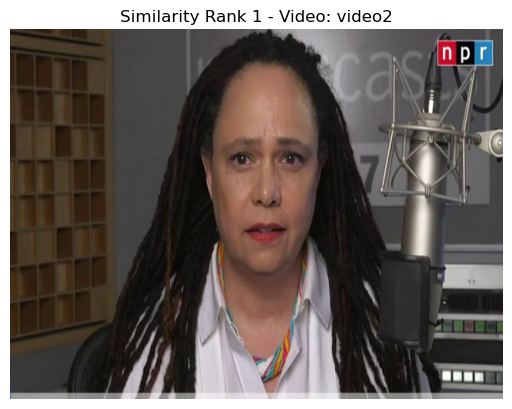

Image Path: C:\Users\yashs\CS482\frames\video1\frame_0001.jpg


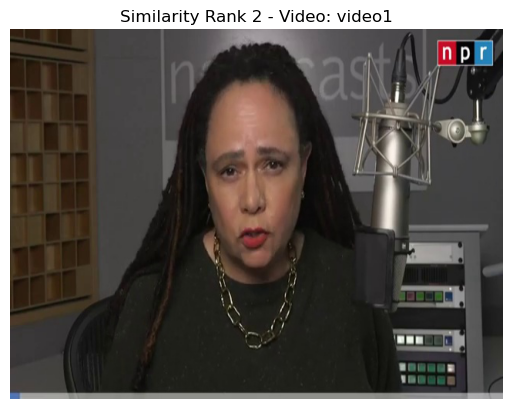

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def search_and_visualize(query_embedding, all_embeddings, frames_folder="frames", top_k=10):
    search_results = sorted(all_embeddings.items(), key=lambda x: sum((a - b) ** 2 for a, b in zip(x[1], query_embedding)))

    for i in range(min(top_k, len(search_results))):
        video_name, embedding = search_results[i]
        video_folder = os.path.join(frames_folder, video_name)
        image_path = os.path.join(video_folder, f"frame_{i:04d}.jpg")

        print("Image Path:", os.path.abspath(image_path))

        img = mpimg.imread(image_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f"Similarity Rank {i+1} - Video: {video_name}")
        plt.axis('off')
        plt.show()

query_embedding = [50,60,80]

search_and_visualize(query_embedding, loaded_embeddings)
